In [1]:
from PIL import Image
from google.colab import userdata
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import pandas as pd
import matplotlib.pyplot as plt

import json
import os

from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    print(line)
    return



# Paths

In [2]:
project_path = userdata.get('PATH_PROJECT')
dataset_path = os.path.join(project_path, 'dataset')
metadata_path = os.path.join(dataset_path, 'dataset_metadata.json')


# Dataset / Dataloader

```
[
    {
        "unique_sample_id": "new_Fuziki_case10_2789_2650",
        "clean_image": 4547604,
        "distorted_image": 4547601,
        "score": 0,
        "metadata": {
            "crop_id": 4547601,
            "image_source": "Fuziki",
            "bp_case": "case10",
            "method": "new",
            "color": "RED",
            "score": 0,
            "roi": [
                    2650,
                    2789,
                    20,
                    20
                ],
            "bp_map": 4547603,
            "IQE_workspace_number": 990
        }
    }
]
```

In [16]:
project_path = userdata.get('PATH_PROJECT')

import sys
src_path = os.path.join(project_path, 'src')
sys.path.append(src_path)

from PairedImageDataset import PairedImageDataset


In [17]:
PairedImageDataset

PairedImageDataset.PairedImageDataset

Batch 0: clean torch.Size([16, 3, 20, 20]), paired torch.Size([16, 3, 20, 20]), scores tensor([0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2])


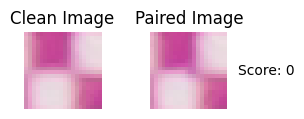

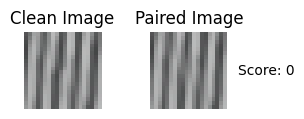

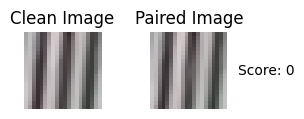

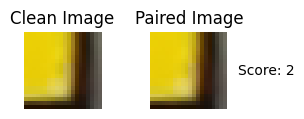

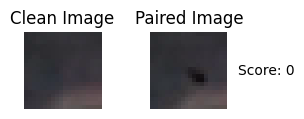

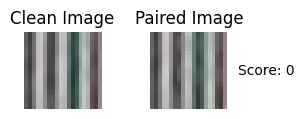

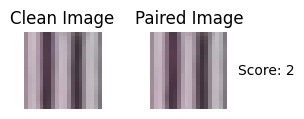

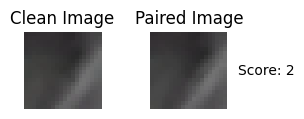

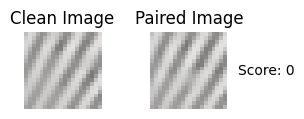

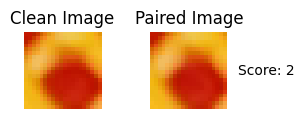

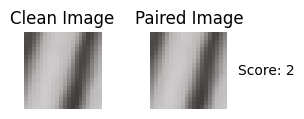

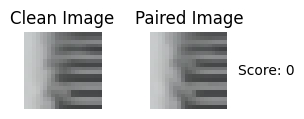

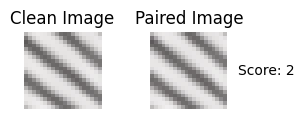

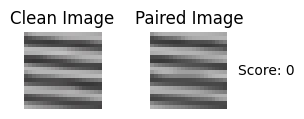

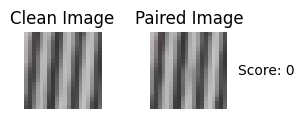

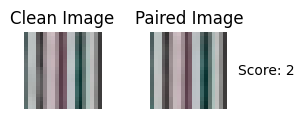

In [5]:
from torchvision.transforms.functional import to_pil_image

# Create dataset and dataloader
dataset = PairedImageDataset(dataset_path, metadata_path)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

# Iterate
for batch_idx, (clean_imgs, paired_imgs, scores) in enumerate(dataloader):
    print(f"Batch {batch_idx}: clean {clean_imgs.shape}, paired {paired_imgs.shape}, scores {scores}")
    # break after first batch
    for i, (clean, distorted) in enumerate(zip(clean_imgs, paired_imgs)):
        # Convert tensors to PIL Images
        clean_pil = to_pil_image(clean)
        distorted_pil = to_pil_image(distorted)

        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(3, 1))

        # Display the images side by side
        axes[0].imshow(clean_pil)
        axes[0].set_title("Clean Image")
        axes[0].axis('off')

        axes[1].imshow(distorted_pil)
        axes[1].set_title("Paired Image")
        axes[1].axis('off')

        # Add the score as text
        plt.text(1.5, 0.5, f'Score: {scores[i].item()}', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)

        plt.show()
    break

# Train / Test Split

## Save

In [ ]:
# Define the paths to save the splits
train_path = os.path.join(dataset_path, 'train_metadata.json')
test_path = os.path.join(dataset_path, 'test_metadata.json')

In [ ]:
%%skip Comment out skip to save train_test_split.json

from sklearn.model_selection import train_test_split

# Split the metadata
train_meta, test_meta = train_test_split(dataset.meta, test_size=0.2, random_state=42)

# Convert to list of dictionaries for JSON serialization
train_list = train_meta.to_dict('records')
test_list = test_meta.to_dict('records')

# Save train data to a JSON file
with open(train_path, 'w') as f:
    json.dump(train_list, f)
print(f"Train data saved to {train_path}")

# Save test data to a JSON file
with open(test_path, 'w') as f:
    json.dump(test_list, f)
print(f"Test data saved to {test_path}")


Comment out skip to save train_test_split.json


## Confirm

In [ ]:
# Read the train / test files
with open(train_path) as train, open(test_path) as test:
    train_samples = json.load(train)
    test_samples = json.load(test)

# Display the JSON entries
print(f'''
train: {len(train_samples)} entries.
[{json.dumps(train_samples[0], indent=2)}]

test: {len(test_samples)} entries.
[{json.dumps(test_samples[0], indent=2)}]
''')




train: 2958 entries.
[{
  "unique_sample_id": "new_RES40_case10_1528_6682",
  "clean_image": 4596520,
  "distorted_image": 4596517,
  "score": 1.0,
  "metadata": {
    "crop_id": 4596517,
    "image_source": "RES40",
    "bp_case": "case10",
    "method": "new",
    "color": "GREEN",
    "score": 1,
    "roi": [
      6682,
      1528,
      20,
      20
    ],
    "bp_map": 4596519,
    "IQE_workspace_number": 990
  }
}]

test: 740 entries.
[{
  "unique_sample_id": "new_TE42_case17_4078_5534",
  "clean_image": 4567725,
  "distorted_image": 4567722,
  "score": 0.5,
  "metadata": {
    "crop_id": 4567722,
    "image_source": "TE42",
    "bp_case": "case17",
    "method": "new",
    "color": "ORANGE",
    "score": 0.5,
    "roi": [
      5534,
      4078,
      20,
      20
    ],
    "bp_map": 4567724,
    "IQE_workspace_number": 990
  }
}]



Displaying first 2 training samples:


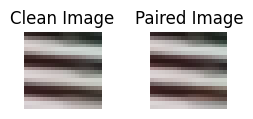

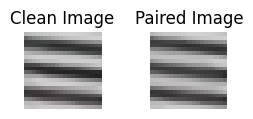


Displaying first 2 testing samples:


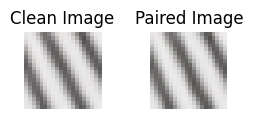

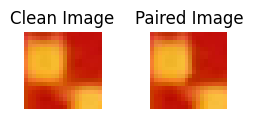

In [ ]:
# Display the first 2 crops from train
print("Displaying first 2 training samples:")
for i in range(min(2, len(train_samples))):
    sample = train_samples[i]
    clean_id = str(sample['clean_image'])
    distorted_id = str(sample['distorted_image'])
    method = sample['metadata']['method']

    clean_path = os.path.join(dataset_path, 'clean', f'{clean_id}.png')
    distorted_path = os.path.join(dataset_path, method, f'{distorted_id}.png')

    if os.path.exists(clean_path) and os.path.exists(distorted_path):
        img_clean = Image.open(clean_path)
        img_other = Image.open(distorted_path)

        fig, axes = plt.subplots(1, 2, figsize=(3, 1))
        axes[0].imshow(img_clean)
        axes[0].set_title("Clean Image")
        axes[0].axis('off')
        axes[1].imshow(img_other)
        axes[1].set_title("Paired Image")
        axes[1].axis('off')
        plt.show()
    else:
        print(f"Image files not found for sample {sample['unique_sample_id']}")


# Display the first 2 crops from test
print("\nDisplaying first 2 testing samples:")
for i in range(min(2, len(test_samples))):
    sample = test_samples[i]
    clean_id = str(sample['clean_image'])
    distorted_id = str(sample['distorted_image'])
    method = sample['metadata']['method']

    clean_path = os.path.join(dataset_path, 'clean', f'{clean_id}.png')
    distorted_path = os.path.join(dataset_path, method, f'{distorted_id}.png')

    if os.path.exists(clean_path) and os.path.exists(distorted_path):
        img_clean = Image.open(clean_path)
        img_other = Image.open(distorted_path)

        fig, axes = plt.subplots(1, 2, figsize=(3, 1))
        axes[0].imshow(img_clean)
        axes[0].set_title("Clean Image")
        axes[0].axis('off')
        axes[1].imshow(img_other)
        axes[1].set_title("Paired Image")
        axes[1].axis('off')
        plt.show()
    else:
        print(f"Image files not found for sample {sample['unique_sample_id']}")